# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "MIROC-ESM"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-process/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/huss_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.641012191772461 to load the data
*********Start to merge*********
It takes elapsed_time 0.033924102783203125 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.11594080924987793 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.63152265548706 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6601872444152832 to mask the layer
*********Start to plot the layer*********


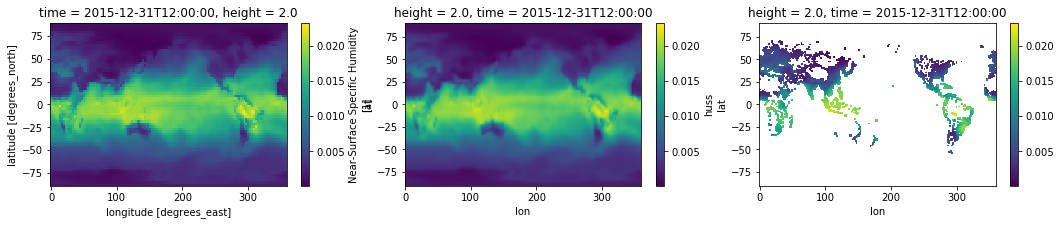

It takes elapsed_time 0.6874792575836182 to plot the layer
It takes elapsed_time 18.77157473564148 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/tas_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.2195799350738525 to load the data
*********Start to merge*********
It takes elapsed_time 0.041198015213012695 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.05232715606689453 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.632628917694092 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6639535427093506 to mask the layer
*********Start to plot the layer*********


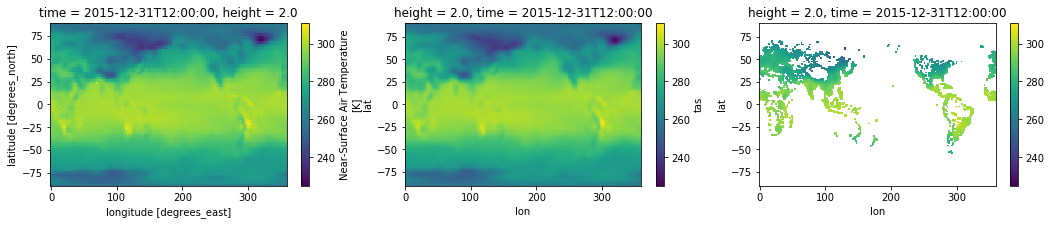

It takes elapsed_time 0.6530458927154541 to plot the layer
It takes elapsed_time 18.263891220092773 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/uas_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.5888800621032715 to load the data
*********Start to merge*********
It takes elapsed_time 0.0379643440246582 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.08635449409484863 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.54294466972351 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6606521606445312 to mask the layer
*********Start to plot the layer*********


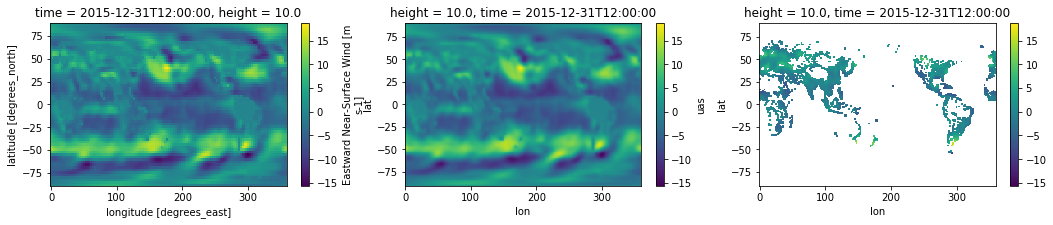

It takes elapsed_time 0.6808781623840332 to plot the layer
It takes elapsed_time 18.598891258239746 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/vas_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.10903787612915 to load the data
*********Start to merge*********
It takes elapsed_time 0.037627458572387695 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.07774925231933594 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.57652235031128 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6593711376190186 to mask the layer
*********Start to plot the layer*********


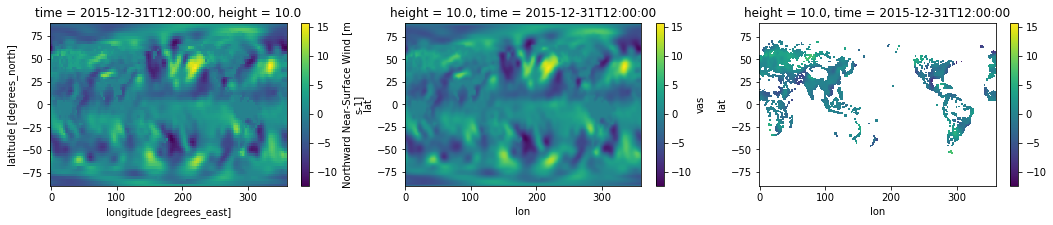

It takes elapsed_time 0.6772117614746094 to plot the layer
It takes elapsed_time 18.139347314834595 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/pr_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 6.128945827484131 to load the data
*********Start to merge*********
It takes elapsed_time 0.04456925392150879 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.06075453758239746 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.627474308013916 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6589956283569336 to mask the layer
*********Start to plot the layer*********


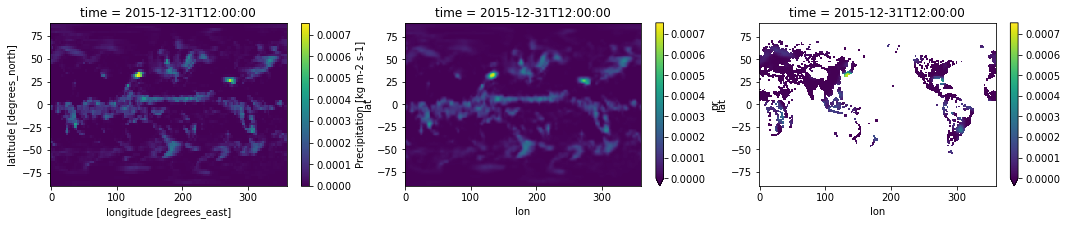

It takes elapsed_time 0.6675689220428467 to plot the layer
It takes elapsed_time 19.19009304046631 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/prsn_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.26932954788208 to load the data
*********Start to merge*********
It takes elapsed_time 0.03933835029602051 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.04331398010253906 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.639480113983154 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6600286960601807 to mask the layer
*********Start to plot the layer*********


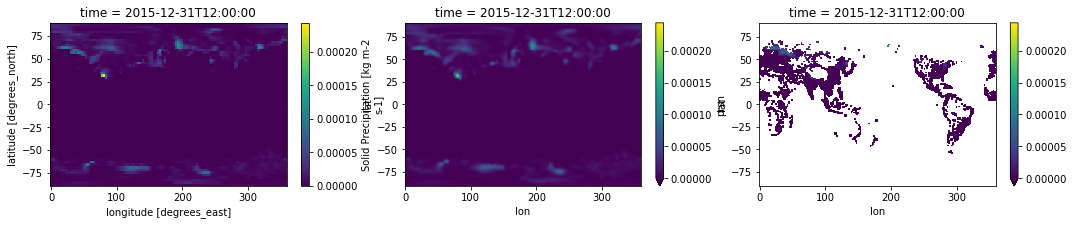

It takes elapsed_time 0.6292483806610107 to plot the layer
It takes elapsed_time 17.282766342163086 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rlds_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.776839017868042 to load the data
*********Start to merge*********
It takes elapsed_time 0.04158520698547363 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.06676936149597168 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.57625937461853 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6652286052703857 to mask the layer
*********Start to plot the layer*********


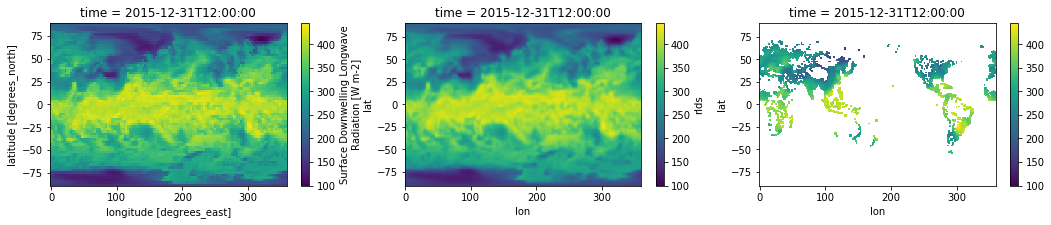

It takes elapsed_time 0.6830997467041016 to plot the layer
It takes elapsed_time 17.811014652252197 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rlus_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.79882550239563 to load the data
*********Start to merge*********
It takes elapsed_time 0.049614906311035156 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.054053544998168945 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.621894598007202 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6678102016448975 to mask the layer
*********Start to plot the layer*********


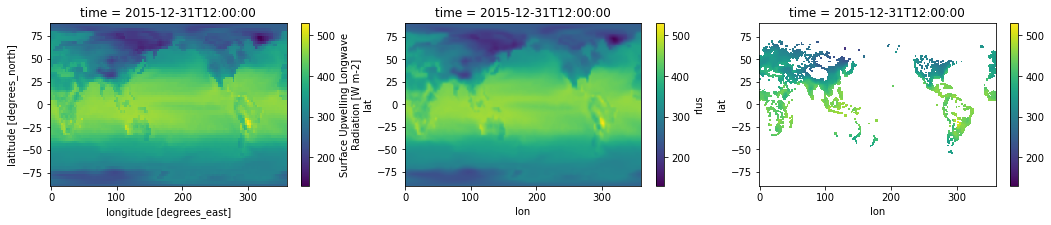

It takes elapsed_time 0.649381160736084 to plot the layer
It takes elapsed_time 18.84316349029541 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rsds_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.196079730987549 to load the data
*********Start to merge*********
It takes elapsed_time 0.02908039093017578 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.06182432174682617 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.732899904251099 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6688497066497803 to mask the layer
*********Start to plot the layer*********


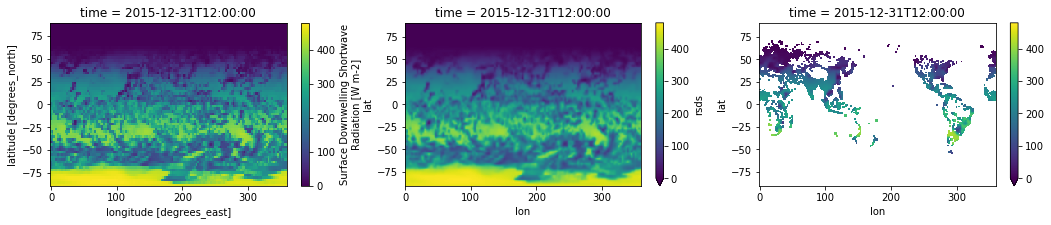

It takes elapsed_time 0.6657793521881104 to plot the layer
It takes elapsed_time 18.355408191680908 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rsus_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.612860679626465 to load the data
*********Start to merge*********
It takes elapsed_time 0.0306546688079834 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.028502941131591797 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.604057788848877 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6791131496429443 to mask the layer
*********Start to plot the layer*********


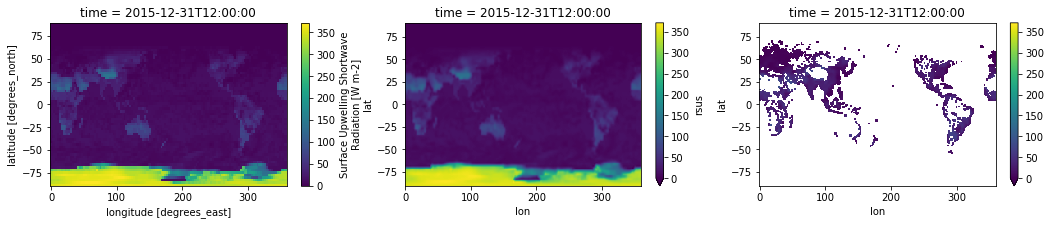

It takes elapsed_time 0.6831021308898926 to plot the layer
It takes elapsed_time 18.639190673828125 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2101, 95)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 35.72242045402527 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

229.05318784713745


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/huss_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.8888137340545654 to load the data
*********Start to merge*********
It takes elapsed_time 0.035611629486083984 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.09295296669006348 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.601799011230469 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6674928665161133 to mask the layer
*********Start to plot the layer*********


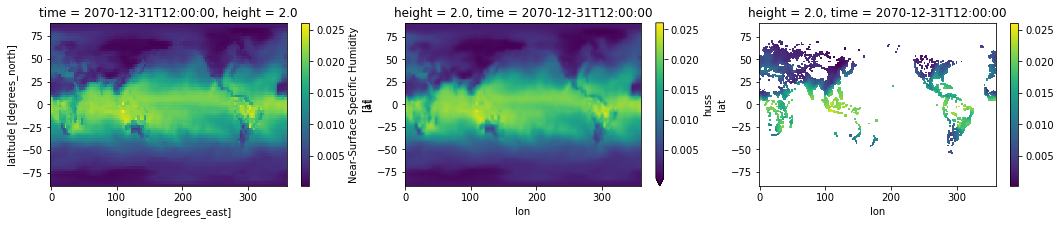

It takes elapsed_time 0.6796565055847168 to plot the layer
It takes elapsed_time 16.9681613445282 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/tas_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.573242425918579 to load the data
*********Start to merge*********
It takes elapsed_time 0.03496980667114258 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.07558727264404297 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.567692756652832 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.656545877456665 to mask the layer
*********Start to plot the layer*********


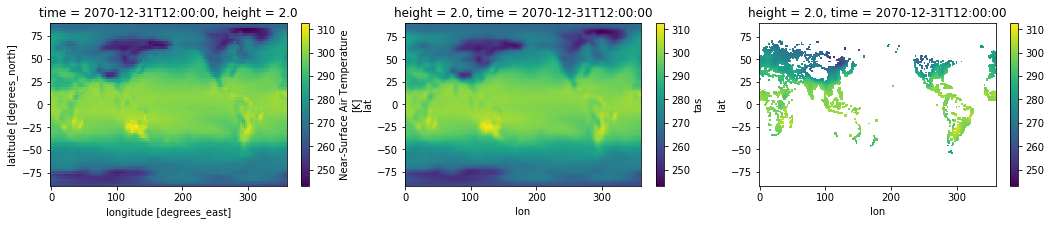

It takes elapsed_time 0.693187952041626 to plot the layer
It takes elapsed_time 16.602110385894775 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/uas_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 2.7541491985321045 to load the data
*********Start to merge*********
It takes elapsed_time 0.030190229415893555 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.05521678924560547 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.53699016571045 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.66827392578125 to mask the layer
*********Start to plot the layer*********


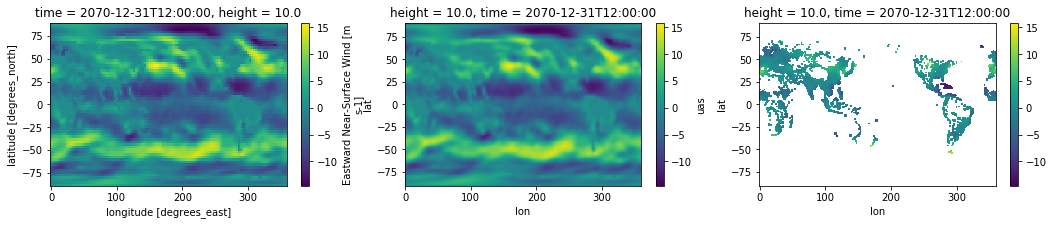

It takes elapsed_time 0.67250657081604 to plot the layer
It takes elapsed_time 15.718483448028564 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/vas_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.06594181060791 to load the data
*********Start to merge*********
It takes elapsed_time 0.05276298522949219 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.058092594146728516 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.584710359573364 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6674590110778809 to mask the layer
*********Start to plot the layer*********


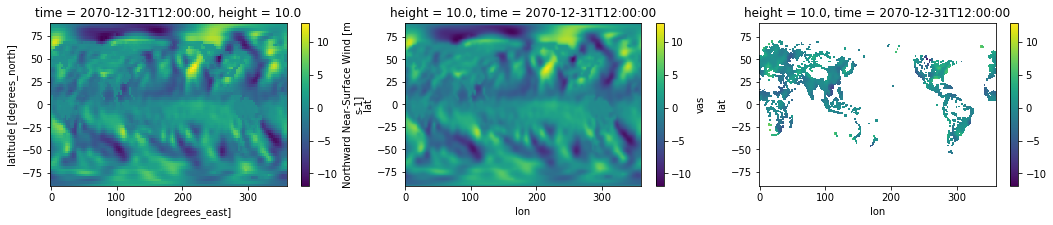

It takes elapsed_time 0.6734333038330078 to plot the layer
It takes elapsed_time 17.104898691177368 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/pr_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.7530994415283203 to load the data
*********Start to merge*********
It takes elapsed_time 0.040927886962890625 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.03057098388671875 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.582061767578125 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6701571941375732 to mask the layer
*********Start to plot the layer*********


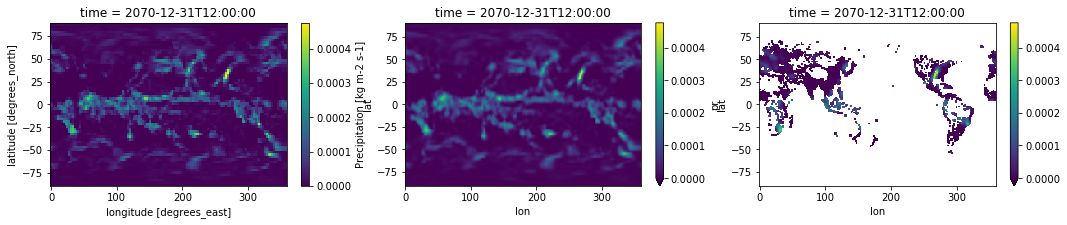

It takes elapsed_time 0.650501012802124 to plot the layer
It takes elapsed_time 16.72920322418213 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/prsn_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.954716205596924 to load the data
*********Start to merge*********
It takes elapsed_time 0.06563258171081543 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.03139495849609375 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.633288860321045 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.677499532699585 to mask the layer
*********Start to plot the layer*********


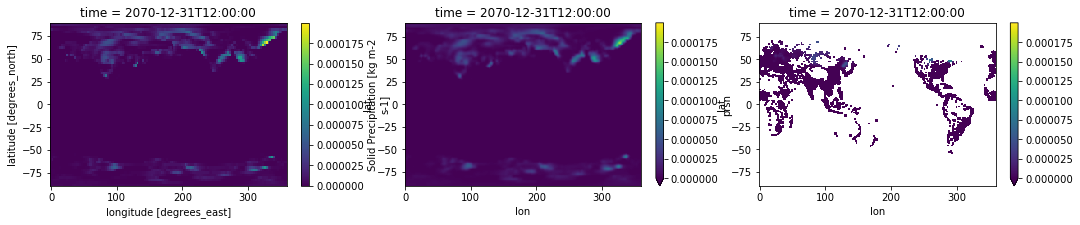

It takes elapsed_time 0.6839849948883057 to plot the layer
It takes elapsed_time 17.048237562179565 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rlds_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.386638879776001 to load the data
*********Start to merge*********
It takes elapsed_time 0.04236602783203125 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.035080909729003906 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.666698694229126 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6738226413726807 to mask the layer
*********Start to plot the layer*********


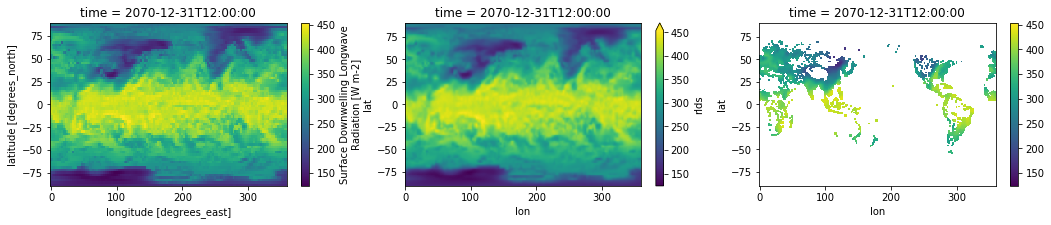

It takes elapsed_time 0.6984517574310303 to plot the layer
It takes elapsed_time 16.504411935806274 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rlus_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.936227083206177 to load the data
*********Start to merge*********
It takes elapsed_time 0.06372928619384766 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.032230377197265625 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.965502977371216 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6720178127288818 to mask the layer
*********Start to plot the layer*********


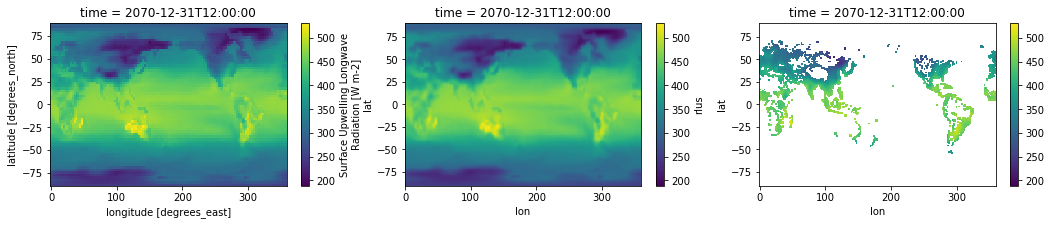

It takes elapsed_time 0.6854612827301025 to plot the layer
It takes elapsed_time 18.356367349624634 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rsds_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.355459213256836 to load the data
*********Start to merge*********
It takes elapsed_time 0.06594371795654297 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.09078478813171387 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.702028036117554 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6839785575866699 to mask the layer
*********Start to plot the layer*********


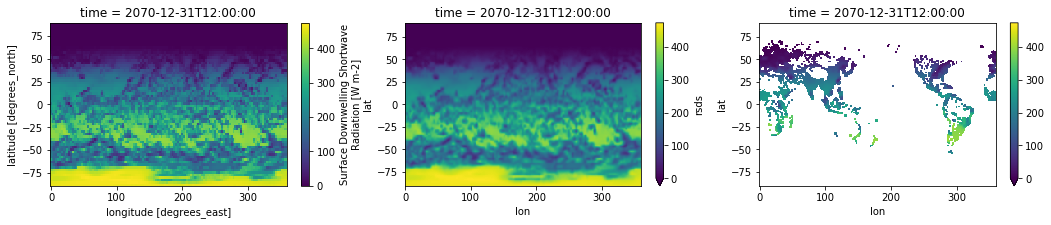

It takes elapsed_time 0.6891965866088867 to plot the layer
It takes elapsed_time 17.589284420013428 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM/rsus_day_MIROC-ESM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.803334474563599 to load the data
*********Start to merge*********
It takes elapsed_time 0.04914093017578125 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.07317090034484863 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.817418813705444 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6804790496826172 to mask the layer
*********Start to plot the layer*********


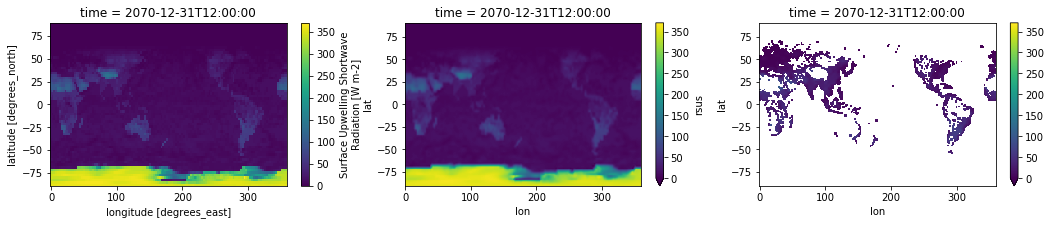

It takes elapsed_time 0.7043344974517822 to plot the layer
It takes elapsed_time 18.12972092628479 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2006, 2101, 95)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 32.051831007003784 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

230.0599672794342
